In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Task1

In [2]:
df = pd.read_csv('data/drug200.csv')
print(df.shape)
df.describe()

(200, 6)


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [3]:

#function to label
def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])

#create a list of data needed to be labeled
categories = ['Sex', 'BP', 'Cholesterol', 'Drug']

for label in categories:
    label_encoder(label)

In [4]:
print(df.shape)
df.describe()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,1.595000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.716305
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [5]:
X = df.drop('Drug', axis=1)
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape)
print(X_test.shape)

(140, 5)
(60, 5)


In [6]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
count_classes = y_test.shape[1]
print(count_classes)

5


In [8]:
model = Sequential()
model.add(Dense(200, activation='relu', input_dim=5))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 1.8177 - accuracy: 0.4143
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 1.4952 - accuracy: 0.5214
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 1.1938 - accuracy: 0.5071
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0927 - accuracy: 0.5571
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 1.1253 - accuracy: 0.5000
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0675 - accuracy: 0.5500
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0589 - accuracy: 0.5429
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0042 - accuracy: 0.5571
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9822 - accuracy: 0.5929
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9527 - accuracy: 0.6143
Epoch 11/100
5/5 [===========

In [11]:
pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test = model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

5/5 [==============================] - 0s 3ms/step
Accuracy on training data: 0.8928571343421936% 
 Error on training data: 0.1071428656578064
2/2 [==============================] - 0s 2ms/step
Accuracy on test data: 0.8666666746139526% 
 Error on test data: 0.13333332538604736


# Task2

In [12]:
from tensorflow import keras

(train_features, train_labels), (test_features, test_labels) = keras.datasets.cifar100.load_data()

In [13]:
print(train_features.shape)
print(test_features.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [14]:
# Normalize pixel values to be between 0 and 1
train_features = train_features.astype('float32') / 255
test_features = test_features.astype('float32') / 255

In [15]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

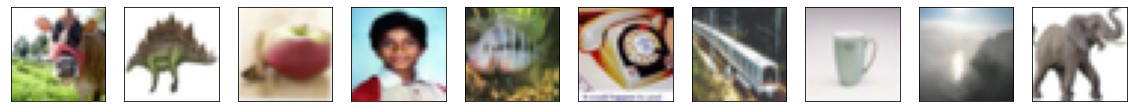

In [16]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_features[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [17]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, LeakyReLU

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=train_features.shape[1:], padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(100, activation='softmax'))


In [18]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [19]:
model.fit(train_features, train_labels, validation_data=(test_features, test_labels), batch_size=64, epochs=3)

Epoch 1/3
782/782 [==============================] - 128s 162ms/step - loss: 0.0585 - accuracy: 0.0494 - val_loss: 0.0536 - val_accuracy: 0.1276
Epoch 2/3
782/782 [==============================] - 130s 166ms/step - loss: 0.0453 - accuracy: 0.1710 - val_loss: 0.0435 - val_accuracy: 0.2305
Epoch 3/3
782/782 [==============================] - 132s 169ms/step - loss: 0.0408 - accuracy: 0.2490 - val_loss: 0.0400 - val_accuracy: 0.2751


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                      

In [21]:
scores = model.evaluate(test_features, test_labels, verbose=0)
print(f'Accuracy: {scores[1]}')

Accuracy: 0.2750999927520752


In [22]:
print(f'Loss: {scores[0]}')

Loss: 0.03995533660054207


# Task3

In [23]:
df = pd.read_csv('data/spam.csv')

In [24]:
df = df[['Category', 'Message']]
df = df[pd.notnull(df['Message'])]
df.rename(columns={'Message': 'Message'}, inplace=True)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [26]:
df.index = range(5572)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

87265

C:\Users\Alexander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


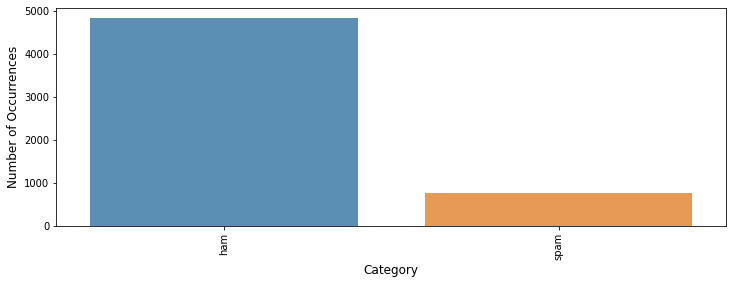

In [27]:
cnt_pro = df['Category'].value_counts()
plt.figure(figsize=(12, 4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [28]:
labels = sorted(list(set(df.Category)))
for i in range(len(labels)):
    df.Category[df.Category == labels[i]] = i

In [29]:
labels_map = {i: labels[i] for i in range(len(labels))}
labels_map

{0: 'ham', 1: 'spam'}

In [30]:
X = df['Message']
y = df['Category']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [32]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, len(labels))
y_test = np_utils.to_categorical(y_test, len(labels))

In [33]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(X_train)

x_train = tokenizer.texts_to_sequences(X_train)
x_train = pad_sequences(x_train, maxlen=30)

x_test = tokenizer.texts_to_sequences(X_test)
x_test = pad_sequences(x_test, maxlen=30)

In [34]:
from keras.layers import Embedding, Dropout, LSTM

model = Sequential()

model.add(Embedding(100, 32, input_length=30))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

In [35]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=20)

[[ 0  0  0 ... 49  3 68]
 [ 0  0  0 ... 10  9  5]
 [ 0  0  0 ...  0 37  7]
 ...
 [ 0  0  0 ... 30 17  4]
 [ 0  0  0 ... 49 30 67]
 [ 0  0  0 ...  0  1 78]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]] [[ 0  0  0 ... 21 18  9]
 [ 0  0  0 ... 65 18  5]
 [ 0  0  0 ...  5  2 21]
 ...
 [ 0  0  0 ...  2  3 16]
 [ 0  0  0 ...  1  1 30]
 [ 0  0  0 ...  7 44 18]] [[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
Epoch 1/20
140/140 [==============================] - 7s 28ms/step - loss: 0.2706 - accuracy: 0.9028 - val_loss: 0.1256 - val_accuracy: 0.9596
Epoch 2/20
140/140 [==============================] - 3s 22ms/step - loss: 0.1138 - accuracy: 0.9610 - val_loss: 0.1048 - val_accuracy: 0.9587
Epoch 3/20
140/140 [==============================] - 3s 22ms/step - loss: 0.0999 - accuracy: 0.9668 - val_loss: 0.1010 - val_accuracy: 0.9614
Epoch 4/20
140/140 [==============================] - 3s 21ms/step - loss: 0.0965 - accuracy: 0.9666 - val_loss: 0.1060 - val_accuracy: 0.9

In [37]:
x_test = tokenizer.texts_to_sequences(X_test)
x_test = pad_sequences(x_test, maxlen=30)

In [38]:
scores = model.evaluate(x_test, y_test)
print(f'Accuracy: {scores[1]}')

35/35 [==============================] - 0s 8ms/step - loss: 0.0877 - accuracy: 0.9713
Accuracy: 0.9713004231452942


In [39]:
print(f'Loss: {scores[0]}')

Loss: 0.08769235759973526
